# Load Sentinel-2 data from the CDSE STAC catalog

This notebook shows an example how to load Sentinel-2 data from the [CDSE STAC API](https://browser.stac.dataspace.copernicus.eu/?.language=en).

### Setup
In order to run this notebook you may install [`xcube_stac`](https://github.com/xcube-dev/xcube-stac), following the [README](../../README.md).

The data can be accessed via S3, where key and secret can be obtained following the [CDSE access documentation to EO data via S3](https://documentation.dataspace.copernicus.eu/APIs/S3.html#generate-secrets). The store object will receive the key and secret upon initialization, as demonstrated below.

Now, we first import everything we need:

In [2]:
%%time
import itertools

import matplotlib.pyplot as plt

from xcube.core.store import new_data_store, get_data_store_params_schema
from xcube_stac.utils import reproject_bbox

CPU times: user 10 µs, sys: 1 µs, total: 11 µs
Wall time: 13.4 µs


Next store the credentials in a dictionary. 

In [3]:
credentials = {
    "key": "O0M0CUQIDQO9TDZ4D8NR",
    "secret": "qPUyXs9G6j8on6MY5KPhQNHuA5uZTqxEscrbBCGx",
}

First, we get the store parameters needed to initialize a STAC [data store](https://xcube.readthedocs.io/en/latest/dataaccess.html#data-store-framework). Note that key and secret of the S3 access are required.

In [3]:
%%time
store_params = get_data_store_params_schema("stac-cdse")
store_params

CPU times: user 22.2 ms, sys: 7.97 ms, total: 30.2 ms
Wall time: 30 ms


Note that the user does not need to provide the URL for the [CDSE STAC API](https://documentation.dataspace.copernicus.eu/APIs/STAC.html). Only the key and secret for S3 access are required when initializing a `stac-cdse` [data store](https://xcube.readthedocs.io/en/latest/dataaccess.html#data-store-framework). First, we will initialize a store supporting the stacking mode. Then, for completeness, we will initialize a store in single-tile mode.

In [4]:
%%time
store = new_data_store("stac-cdse", stack_mode=True, **credentials)

CPU times: user 9.55 ms, sys: 962 µs, total: 10.5 ms
Wall time: 1.52 s


The data IDs point to a STAC collections. So far only `'sentinel-2-l2a'` is supported.

In [5]:
%%time
data_ids = store.list_data_ids()
data_ids

CPU times: user 18.2 ms, sys: 2.07 ms, total: 20.2 ms
Wall time: 844 ms


['sentinel-1-grd',
 'sentinel-1-mosaic',
 'sentinel-2-global-mosaics',
 'sentinel-2-l1c',
 'sentinel-2-l2a',
 'sentinel-3-olci-1-efr-nrt',
 'sentinel-3-olci-1-efr-ntc',
 'sentinel-3-olci-1-err-nrt',
 'sentinel-3-olci-1-err-ntc',
 'sentinel-3-olci-2-lfr-nrt',
 'sentinel-3-olci-2-lfr-ntc',
 'sentinel-3-olci-2-lrr-nrt',
 'sentinel-3-olci-2-lrr-ntc',
 'sentinel-3-olci-2-wfr-nrt',
 'sentinel-3-olci-2-wfr-ntc',
 'sentinel-3-olci-2-wrr-nrt',
 'sentinel-3-olci-2-wrr-ntc']

Below, the parameters for the `open_data` method can be viewed.

In [6]:
%%time
open_params = store.get_open_data_params_schema()
open_params

CPU times: user 32 µs, sys: 0 ns, total: 32 µs
Wall time: 34.8 µs


So far, only data from the collection `sentinel-2-l2a` can be accessed. We therefore assign `data_id` to `"sentinel-2-l2a"`. We set the bounding box to cover the greater Hamburg area and the time range to second half of July 2020.

In [7]:
%%time
bbox = [9.1, 53.1, 10.7, 54]
crs_target = "EPSG:32632"
bbox_utm = reproject_bbox(bbox, "EPSG:4326", crs_target)
time_range = ["2020-07-15", "2020-08-01"]

CPU times: user 411 µs, sys: 990 µs, total: 1.4 ms
Wall time: 1.05 ms


In [8]:
%%time
ds = store.open_data(
    data_id="sentinel-2-l2a",
    bbox=bbox_utm,
    time_range=time_range,
    spatial_res=10,
    crs=crs_target,
    asset_names=["B02", "B03", "B04", "SCL"],
    apply_scaling=True,
)
ds

2025-04-02 09:33:18.638004 B02
2025-04-02 09:33:39.079974 B03
2025-04-02 09:33:59.233896 B04
2025-04-02 09:34:19.504701 SCL
CPU times: user 31.2 s, sys: 1.05 s, total: 32.2 s
Wall time: 1min 24s


<xarray.Dataset> Size: 38GB
Dimensions:      (time: 11, y: 10147, x: 10727)
Coordinates:
  * time         (time) datetime64[ns] 88B 2020-07-15T10:15:59.024000 ... 202...
  * x            (x) float64 86kB 5.066e+05 5.066e+05 ... 6.138e+05 6.138e+05
  * y            (y) float64 81kB 5.985e+06 5.985e+06 ... 5.883e+06 5.883e+06
    spatial_ref  int64 8B 0
Data variables:
    B02          (time, y, x) float64 10GB dask.array<chunksize=(1, 535, 605), meta=np.ndarray>
    B03          (time, y, x) float64 10GB dask.array<chunksize=(1, 535, 605), meta=np.ndarray>
    B04          (time, y, x) float64 10GB dask.array<chunksize=(1, 535, 605), meta=np.ndarray>
    SCL          (time, y, x) float64 10GB dask.array<chunksize=(1, 535, 605), meta=np.ndarray>
Attributes: (12/13)
    geospatial_lon_units:       degrees_east
    geospatial_lon_min:         9.097826619118917
    geospatial_lon_max:         10.73646084270511
    geospatial_lon_resolution:  0.00015284912594815125
    geospatial_lat_units:       degrees_north
    geospatial_lat_min:         53.10000657225392
    ...                         ...
    geospatial_lat_resolution:  8.872812873761404e-05
    geospatial_bounds_crs:      CRS84
    geospatial_bounds:          POLYGON((9.097826619118917 53.10000657225392,...
    date_modified:              2025-04-02T09:34:39.606579
    stac_catalog_url:           https://stac.dataspace.copernicus.eu/v1
    stac_item_ids:              {'2020-07-15T10:15:59.024000': ['S2B_MSIL2A_2...

Note that the search function in the CDSE STAC API is very slow. Further investigation and comparison with other STAC APIs is needed. 

We can plot the B04 (red) band for a given timestamp as an example. Hereby a mosaicking of multiple tiles have been applied. Additionally, we plot the solar and viewing angle.

CPU times: user 22.7 s, sys: 1.45 s, total: 24.2 s
Wall time: 43.1 s


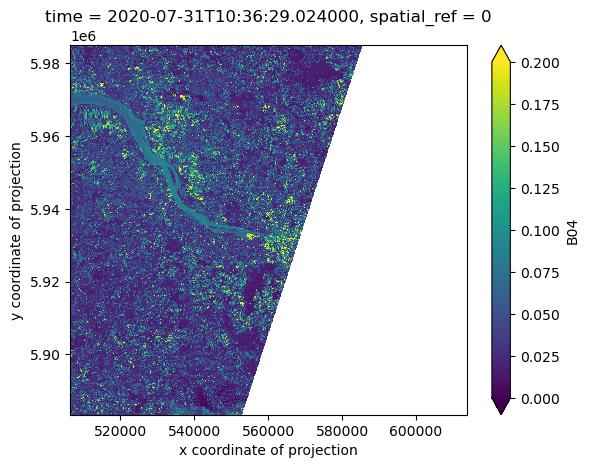

In [9]:
%%time
ds.B04.isel(time=-1)[::10, ::10].plot(vmin=0, vmax=0.2)

----
## Data store in the single-tile mode
For completeness, we initiate the data store in the single-tile mode and open data of one tile. 

In [4]:
%%time
store = new_data_store("stac-cdse", stack_mode=False, **credentials)

CPU times: user 46 ms, sys: 7.98 ms, total: 54 ms
Wall time: 315 ms


The data IDs point to a [STAC item's JSON](https://github.com/radiantearth/stac-spec/blob/master/item-spec/item-spec.md) and are specified by the segment of the URL that follows the catalog's URL. The data IDs can be streamed using the following code where we show the first 10 data IDs as an example.

⚠️ Warning: If you use `store.list_data_ids()` it will try to collect all Sentinel-2 tiles in the archive, before printing the result. This can take a while, and is not recommended. 

In [5]:
%%time
data_ids = store.get_data_ids()
list(itertools.islice(data_ids, 10))

CPU times: user 8.23 ms, sys: 24 µs, total: 8.26 ms
Wall time: 478 ms


['collections/sentinel-1-grd/items/S1A_EW_GRDM_1SDH_20250402T121346_20250402T121413_058577_074000_6225_COG',
 'collections/sentinel-1-grd/items/S1A_IW_GRDH_1SSH_20250402T121206_20250402T121236_058577_073FFF_86EE_COG',
 'collections/sentinel-1-grd/items/S1A_IW_GRDH_1SSH_20250402T121141_20250402T121206_058577_073FFF_6D55_COG',
 'collections/sentinel-1-grd/items/S1A_IW_GRDH_1SSH_20250402T121116_20250402T121141_058577_073FFF_8FAC_COG',
 'collections/sentinel-1-grd/items/S1A_IW_GRDH_1SSH_20250402T121051_20250402T121116_058577_073FFF_56DB_COG',
 'collections/sentinel-1-grd/items/S1A_IW_GRDH_1SSH_20250402T121022_20250402T121051_058577_073FFF_B859_COG',
 'collections/sentinel-1-grd/items/S1C_EW_GRDM_1SDH_20250402T120416_20250402T120456_001714_002EE7_D1D3_COG',
 'collections/sentinel-1-grd/items/S1C_EW_GRDM_1SDH_20250402T120316_20250402T120416_001714_002EE7_78F7_COG',
 'collections/sentinel-1-grd/items/S1C_EW_GRDM_1SDH_20250402T120216_20250402T120316_001714_002EE7_BB8B_COG',
 'collections/senti

In the next step, we can search for items using search parameters. The following code shows which search parameters are available.

In [6]:
%%time
search_params = store.get_search_params_schema()
search_params

CPU times: user 29 µs, sys: 3 µs, total: 32 µs
Wall time: 33.6 µs


 Next, we will search for tiles of Sentinel-2 data.

In [7]:
%%time
descriptors = list(
    store.search_data(
        collections=["sentinel-2-l2a"],
        bbox=[9, 47, 10, 48],
        time_range=["2020-07-01", "2020-07-05"],
    )
)
[d.to_dict() for d in descriptors]

CPU times: user 175 ms, sys: 8.74 ms, total: 183 ms
Wall time: 3.11 s


[{'data_id': 'collections/sentinel-2-l2a/items/S2B_MSIL2A_20200705T101559_N0500_R065_T32UNU_20230530T175912',
  'data_type': 'dataset',
  'bbox': [8.999728, 47.755819, 10.493269, 48.753013],
  'time_range': ('2020-07-05T10:15:59.024Z', '2020-07-05T10:15:59.024Z')},
 {'data_id': 'collections/sentinel-2-l2a/items/S2B_MSIL2A_20200705T101559_N0500_R065_T32UMU_20230530T175912',
  'data_type': 'dataset',
  'bbox': [8.087776, 47.759622, 9.132783, 48.752937],
  'time_range': ('2020-07-05T10:15:59.024Z', '2020-07-05T10:15:59.024Z')},
 {'data_id': 'collections/sentinel-2-l2a/items/S2B_MSIL2A_20200705T101559_N0500_R065_T32TNT_20230530T175912',
  'data_type': 'dataset',
  'bbox': [8.999733, 46.85664, 10.467277, 47.853702],
  'time_range': ('2020-07-05T10:15:59.024Z', '2020-07-05T10:15:59.024Z')},
 {'data_id': 'collections/sentinel-2-l2a/items/S2B_MSIL2A_20200705T101559_N0500_R065_T32TMT_20230530T175912',
  'data_type': 'dataset',
  'bbox': [7.760786, 46.858555, 9.13047, 47.853628],
  'time_range':

In the next step, we can open the data for each data ID. The following code shows which parameters are available for opening the data.

In [8]:
%%time
open_params = store.get_open_data_params_schema()
open_params

CPU times: user 30 µs, sys: 3 µs, total: 33 µs
Wall time: 34.6 µs


We select the band B04 (red), B03 (green), B02 (blue), and the science classification layer (SLC), and lazily load the corresponding data.

In [9]:
%%time
ds = store.open_data(
    "collections/sentinel-2-l2a/items/S2B_MSIL2A_20200705T101559_N0500_R065_T32TMT_20230530T175912",
    asset_names=["B04", "B03", "B02", "SCL"],
    apply_scaling=True,
    angles_sentinel2=True
)
ds

CPU times: user 261 ms, sys: 41.1 ms, total: 302 ms
Wall time: 2.63 s


<xarray.Dataset> Size: 3GB
Dimensions:        (x: 10980, y: 10980, angle: 2, angle_x: 23, angle_y: 23,
                    band: 3)
Coordinates:
  * x              (x) float64 88kB 4e+05 4e+05 4e+05 ... 5.097e+05 5.098e+05
  * y              (y) float64 88kB 5.3e+06 5.3e+06 ... 5.19e+06 5.19e+06
    spatial_ref    int64 8B 0
  * angle          (angle) <U7 56B 'Zenith' 'Azimuth'
  * angle_x        (angle_x) float64 184B 4.025e+05 4.075e+05 ... 5.125e+05
  * angle_y        (angle_y) float64 184B 5.298e+06 5.293e+06 ... 5.188e+06
  * band           (band) <U5 60B 'B02' 'B03' 'B04'
Data variables:
    B04            (y, x) float64 964MB dask.array<chunksize=(1024, 1024), meta=np.ndarray>
    B03            (y, x) float64 964MB dask.array<chunksize=(1024, 1024), meta=np.ndarray>
    B02            (y, x) float64 964MB dask.array<chunksize=(1024, 1024), meta=np.ndarray>
    SCL            (y, x) uint8 121MB dask.array<chunksize=(1024, 1024), meta=np.ndarray>
    solar_angle    (angle, angle_y, angle_x) float32 4kB 28.4 28.38 ... 148.2
    viewing_angle  (angle, band, angle_y, angle_x) float32 13kB nan ... 123.6
Attributes:
    stac_catalog_url:  https://stac.dataspace.copernicus.eu/v1
    stac_item_id:      S2B_MSIL2A_20200705T101559_N0500_R065_T32TMT_20230530T...

We plot the loaded data as an example below.

In [13]:
%%time
ds.B03.compute()

CPU times: user 22.4 s, sys: 2.71 s, total: 25.1 s
Wall time: 31.4 s


<xarray.DataArray 'B03' (y: 10980, x: 10980)> Size: 964MB
array([[-0.1   , -0.1   , -0.1   , ...,  0.115 ,  0.1104,  0.1066],
       [-0.1   , -0.1   , -0.1   , ...,  0.0952,  0.0938,  0.0905],
       [-0.1   , -0.1   , -0.1   , ...,  0.0806,  0.0804,  0.0827],
       ...,
       [-0.1   , -0.1   , -0.1   , ...,  0.332 ,  0.3284,  0.279 ],
       [-0.1   , -0.1   , -0.1   , ...,  0.2902,  0.2918,  0.282 ],
       [-0.1   , -0.1   , -0.1   , ...,  0.2598,  0.2744,  0.293 ]])
Coordinates:
  * x            (x) float64 88kB 4e+05 4e+05 4e+05 ... 5.097e+05 5.098e+05
  * y            (y) float64 88kB 5.3e+06 5.3e+06 5.3e+06 ... 5.19e+06 5.19e+06
    spatial_ref  int64 8B 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0
    grid_mapping:  spatial_ref

In [12]:
%%time
ds.B04[:2000, -2000:].compute()

CPU times: user 1.06 s, sys: 32.7 ms, total: 1.09 s
Wall time: 1.01 s


<xarray.DataArray 'B04' (y: 2000, x: 2000)> Size: 32MB
array([[0.083 , 0.0634, 0.0622, ..., 0.1024, 0.0996, 0.0898],
       [0.0731, 0.0596, 0.0602, ..., 0.0805, 0.0774, 0.0718],
       [0.0791, 0.0642, 0.0507, ..., 0.064 , 0.0646, 0.067 ],
       ...,
       [0.0934, 0.1084, 0.116 , ..., 0.0483, 0.0474, 0.0494],
       [0.0855, 0.1134, 0.1166, ..., 0.0472, 0.0502, 0.0524],
       [0.072 , 0.0986, 0.1116, ..., 0.0445, 0.0524, 0.0548]])
Coordinates:
  * x            (x) float64 16kB 4.898e+05 4.898e+05 ... 5.097e+05 5.098e+05
  * y            (y) float64 16kB 5.3e+06 5.3e+06 5.3e+06 ... 5.28e+06 5.28e+06
    spatial_ref  int64 8B 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0
    grid_mapping:  spatial_ref

CPU times: user 1.68 s, sys: 143 ms, total: 1.83 s
Wall time: 9.39 s


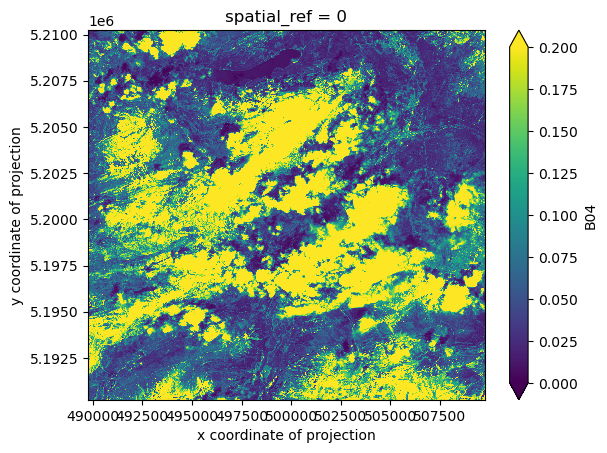

In [9]:
%%time
ds.B04[-2000:, -2000:].plot(vmin=0.0, vmax=0.2)

CPU times: user 16.6 s, sys: 538 ms, total: 17.1 s
Wall time: 23.1 s


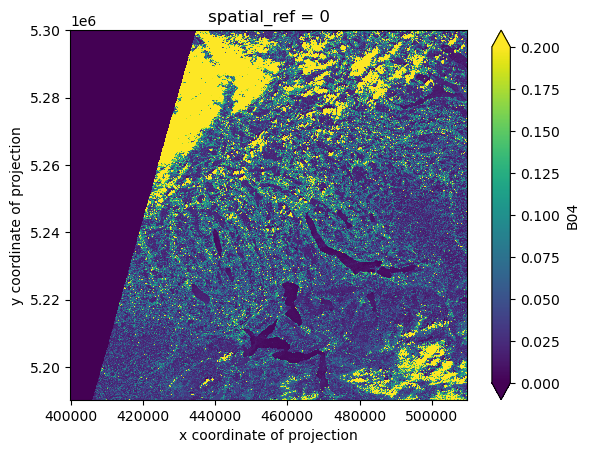

In [10]:
%%time
ds.B04[::10, ::10].plot(vmin=0.0, vmax=0.2)

We can also open a `.jp2` as a [xcube's multi-resolution  dataset](https://xcube.readthedocs.io/en/latest/mldatasets.html#xcube-multi-resolution-datasets), where we can select the level of resolution, shown below.  

In [17]:
%%time
mlds = store.open_data(
    descriptors[3].data_id,
    data_type="mldataset",
    asset_names=["B04", "B03", "B02"],
    apply_scaling=True
)
mlds.num_levels

CPU times: user 20.3 ms, sys: 1.97 ms, total: 22.3 ms
Wall time: 568 ms


5

In [18]:
%%time
ds = mlds.get_dataset(2)
ds

CPU times: user 68 ms, sys: 8.02 ms, total: 76 ms
Wall time: 499 ms


<xarray.Dataset> Size: 181MB
Dimensions:      (x: 2745, y: 2745)
Coordinates:
  * x            (x) float64 22kB 4e+05 4e+05 4.001e+05 ... 5.097e+05 5.097e+05
  * y            (y) float64 22kB 5.3e+06 5.3e+06 5.3e+06 ... 5.19e+06 5.19e+06
    spatial_ref  int64 8B 0
Data variables:
    B04          (y, x) float64 60MB dask.array<chunksize=(1024, 1024), meta=np.ndarray>
    B03          (y, x) float64 60MB dask.array<chunksize=(1024, 1024), meta=np.ndarray>
    B02          (y, x) float64 60MB dask.array<chunksize=(1024, 1024), meta=np.ndarray>
Attributes:
    stac_catalog_url:  https://stac.dataspace.copernicus.eu/v1
    stac_item_id:      S2B_MSIL2A_20200705T101559_N0500_R065_T32TMT_20230530T...

CPU times: user 2.61 s, sys: 638 ms, total: 3.24 s
Wall time: 23.8 s


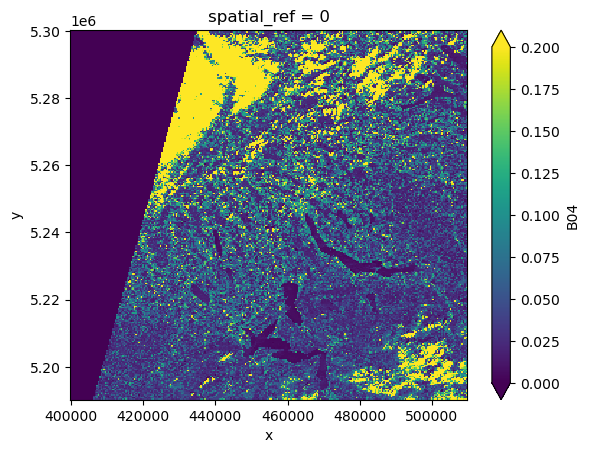

In [19]:
%%time
ds.B04[::10, ::10].plot(vmin=0.0, vmax=0.2)